In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


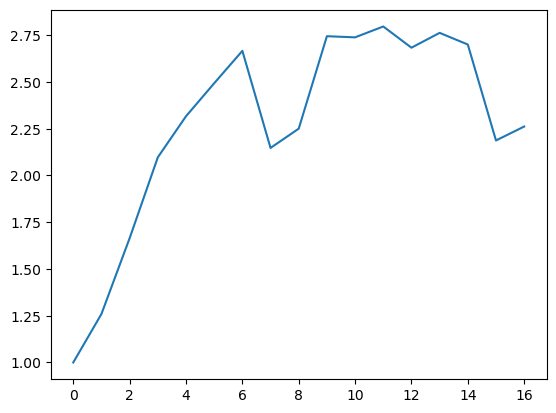

In [9]:
## Speedup graphs
threads = np.array([1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32])
avg_times = np.zeros(threads.shape)
for i, n in enumerate(threads):
    times = np.genfromtxt('output/timer' + str(n) + ".csv", delimiter=',')
    avg_times[i] = times.mean()

plt.plot(avg_times[0]/avg_times)
plt.show()

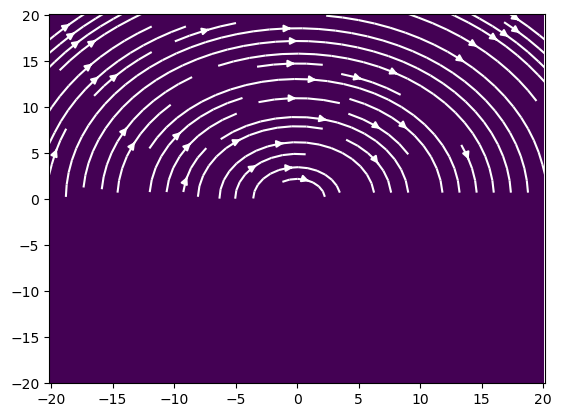

In [4]:
i = 10
input_dir = 'vortex/'
u = np.genfromtxt('output/u'+str(i)+'.csv', delimiter=',')
v = np.genfromtxt('output/v'+str(i)+'.csv', delimiter=',')
Re = np.genfromtxt('output/Re'+str(i)+'.csv', delimiter=',')
# tracer = np.genfromtxt('output/tracer'+str(i)+'.csv', delimiter=',')
x = np.genfromtxt(input_dir + 'x.csv', delimiter=',')
y = np.genfromtxt(input_dir + 'y.csv', delimiter=',')
p = np.genfromtxt(input_dir + 'p.csv', delimiter=',')
gx = np.genfromtxt(input_dir + 'gx.csv', delimiter=',')
gy = np.genfromtxt(input_dir + 'gy.csv', delimiter=',')

X, Y = np.meshgrid(x, y)
plt.pcolor(x[2:-2], y[2:-2], Re[2:-2,2:-2], shading='auto')
plt.streamplot(X, Y, u, v, color='w')
# plt.quiver(x, y, gx, gy)
# plt.scatter(tracer[0,:], tracer[1,:], c='white', s=20.0, edgecolors='black')
plt.show()

In [17]:
# Initialize variables
i_start = 0  # Start index
ie = 500  # End index
di = 10   # Step size
input_dir = 'vortex/'
fps = 8  # Frames per second

# Create a figure and an axes
fig, ax = plt.subplots()

# Animation update function
def update(i):
    ax.clear()  # Clear the plot to draw a new frame
    # Load data
    u = np.genfromtxt(f'output/u{i}.csv', delimiter=',')
    v = np.genfromtxt(f'output/v{i}.csv', delimiter=',')
    Re = np.genfromtxt(f'output/Re{i}.csv', delimiter=',')
    # tracer = np.genfromtxt(f'output/tracer{i}.csv', delimiter=',')
    p = np.genfromtxt(input_dir + 'p.csv', delimiter=',')
    gx = np.genfromtxt(input_dir + 'gx.csv', delimiter=',')
    gy = np.genfromtxt(input_dir + 'gy.csv', delimiter=',')
    X, Y = np.meshgrid(x, y)

    # Create plots
    c = ax.pcolor(x, y, Re.T, shading='auto')
    ax.streamplot(X, Y, u, v, color='w')
    ax.quiver(x, y, gx, gy)
    # plt.scatter(tracer[0,:], tracer[1,:], c='white', s=20.0, edgecolors='black')

    # Optional: Set plot limits, labels, titles
    ax.set_xlim([x.min(), x.max()])
    ax.set_ylim([y.min(), y.max()])
    ax.set_title(f"Time step: {i}")

    return c,

# Preload x, y since they do not change
x = np.genfromtxt(input_dir + 'x.csv', delimiter=',')
y = np.genfromtxt(input_dir + 'y.csv', delimiter=',')

# Create animation
ani = FuncAnimation(fig, update, frames=range(i_start, ie + 1, di), blit=True)

# Save animation
ani.save('vortex_animation.mp4', writer='ffmpeg', fps=fps)

plt.show()  # Show the plot window (optional, will not show when saving)

In [1]:
i = 0
input_dir = 'vortex/'
u = np.genfromtxt('output/u'+str(i)+'.csv', delimiter=',')
v = np.genfromtxt('output/v'+str(i)+'.csv', delimiter=',')
Re = np.genfromtxt('output/Re'+str(i)+'.csv', delimiter=',')
x = np.genfromtxt(input_dir + 'x.csv', delimiter=',')
y = np.genfromtxt(input_dir + 'y.csv', delimiter=',')
p = np.genfromtxt(input_dir + 'p.csv', delimiter=',')
gx = np.genfromtxt(input_dir + 'gx.csv', delimiter=',')
gy = np.genfromtxt(input_dir + 'gy.csv', delimiter=',')

X, Y = np.meshgrid(x, y)
plt.pcolor(x[2:-2], y[2:-2], Re[2:-2,2:-2].T, shading='auto')
plt.streamplot(X, Y, u, v, color='w')
plt.quiver(x, y, gx, gy)
plt.show()

NameError: name 'np' is not defined